## Persipan Dataset

In [1]:
! wget https://raw.githubusercontent.com/datalearns247/Time-Series-Analysis/refs/heads/main/datasets/Nvidia-20230103-20240804.csv

--2024-10-09 15:10:55--  https://raw.githubusercontent.com/datalearns247/Time-Series-Analysis/refs/heads/main/datasets/Nvidia-20230103-20240804.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23746 (23K) [text/plain]
Saving to: ‘Nvidia-20230103-20240804.csv’

Nvidia-20230103-202 100%[===================>]  23.19K  --.-KB/s    in 0.001s  

2024-10-09 15:10:55 (18.0 MB/s) - ‘Nvidia-20230103-20240804.csv’ saved [23746/23746]



In [2]:
! head Nvidia-20230103-20240804.csv

Date,Open,High,Low,Close,Adj Close,Volume
2023-01-03,148.509995,149.960007,140.960007,143.149994,143.079773,40127700
2023-01-04,145.669998,148.529999,142.410004,147.490005,147.417679,43132400
2023-01-05,144.910004,145.639999,141.479996,142.649994,142.580048,38916800
2023-01-06,144.740005,150.100006,140.339996,148.589996,148.517120,40504400
2023-01-09,152.839996,160.559998,151.410004,156.279999,156.203354,50423100
2023-01-10,155.070007,159.619995,154.720001,159.089996,159.011978,38410100
2023-01-11,158.399994,160.279999,155.630005,160.009995,159.931519,35328500
2023-01-12,161.000000,166.369995,154.919998,165.110001,165.029037,55140900
2023-01-13,162.779999,169.220001,161.649994,168.990005,168.907150,44728700


In [3]:
! tail Nvidia-20230103-20240804.csv

2024-03-22,911.409973,947.780029,908.340027,942.890015,942.890015,58521500
2024-03-25,939.409973,967.659973,935.099976,950.020020,950.020020,55213600
2024-03-26,958.510010,963.750000,925.020020,925.609985,925.609985,51364800
2024-03-27,931.119995,932.400024,891.229980,902.500000,902.500000,58606700
2024-03-28,900.000000,913.000000,891.929993,903.559998,903.559998,43521200
2024-04-01,902.989990,922.250000,892.039978,903.630005,903.630005,45244100
2024-04-02,884.479980,900.940002,876.200012,894.520020,894.520020,43306400
2024-04-03,884.840027,903.739990,884.000000,889.640015,889.640015,37006700
2024-04-04,904.059998,906.340027,858.799988,859.049988,859.049988,43496500
2024-04-05,868.659973,884.809998,859.260010,880.080017,880.080017,39885700

## Read Dataset

In [35]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot  as  plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [3]:
df_nvdia = pd.read_csv("Nvidia-20230103-20240804.csv", header=0)

In [4]:
df_nvdia.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,148.509995,149.960007,140.960007,143.149994,143.079773,40127700
1,2023-01-04,145.669998,148.529999,142.410004,147.490005,147.417679,43132400
2,2023-01-05,144.910004,145.639999,141.479996,142.649994,142.580048,38916800
3,2023-01-06,144.740005,150.100006,140.339996,148.589996,148.517120,40504400
4,2023-01-09,152.839996,160.559998,151.410004,156.279999,156.203354,50423100


## Data Understanding

In [5]:
df_nvdia.shape

(316, 7)

In [6]:
df_nvdia.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [7]:
df_nvdia.describe()

,Open,High,Low,Close,Adj Close,Volume
count,316.000000,316.000000,316.000000,316.000000,316.000000,3.160000e+02
mean,442.512562,450.207626,434.991581,443.237658,443.169313,4.853597e+07
std,191.118032,194.447311,186.845744,190.585786,190.611541,1.597081e+07
min,144.740005,145.639999,140.339996,142.649994,142.580048,1.982090e+07
25%,276.659996,280.000000,272.902504,277.699989,277.610939,3.885245e+07
50%,438.299988,441.930007,430.015000,437.804993,437.709931,4.503665e+07
75%,490.817504,495.602501,481.565010,488.444992,488.411331,5.412765e+07
max,958.510010,974.000000,935.099976,950.020020,950.020020,1.543911e+08


In [9]:
df_nvdia.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


<Axes: >

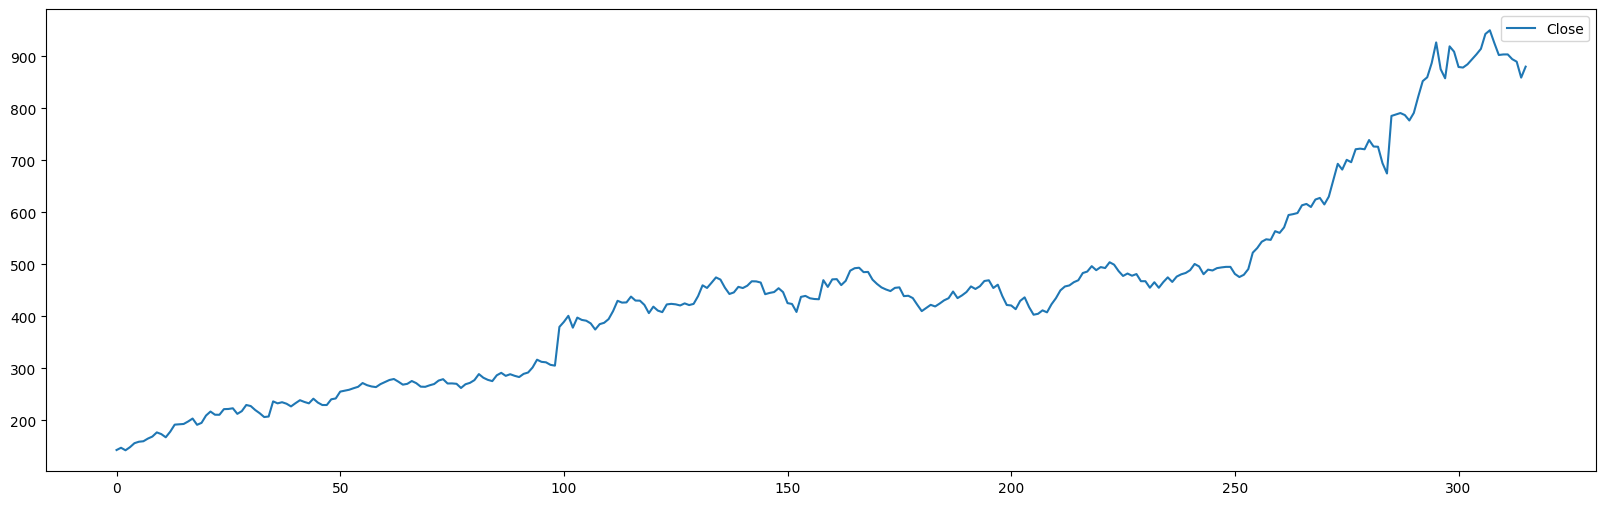

In [8]:
df_nvdia.plot(y=["Close"], figsize = (20,6))

In [10]:
df_nvdia['date'] = pd.to_datetime(df_nvdia['Date'])

In [12]:
df_nvdia['year'] = df_nvdia['date'].dt.year

In [13]:
df_nvdia['year'].value_counts()

,count
year,
2023,250
2024,66


Menghitung rata-rata nilai untuk 12 hari, untuk melihat trend

<Axes: >

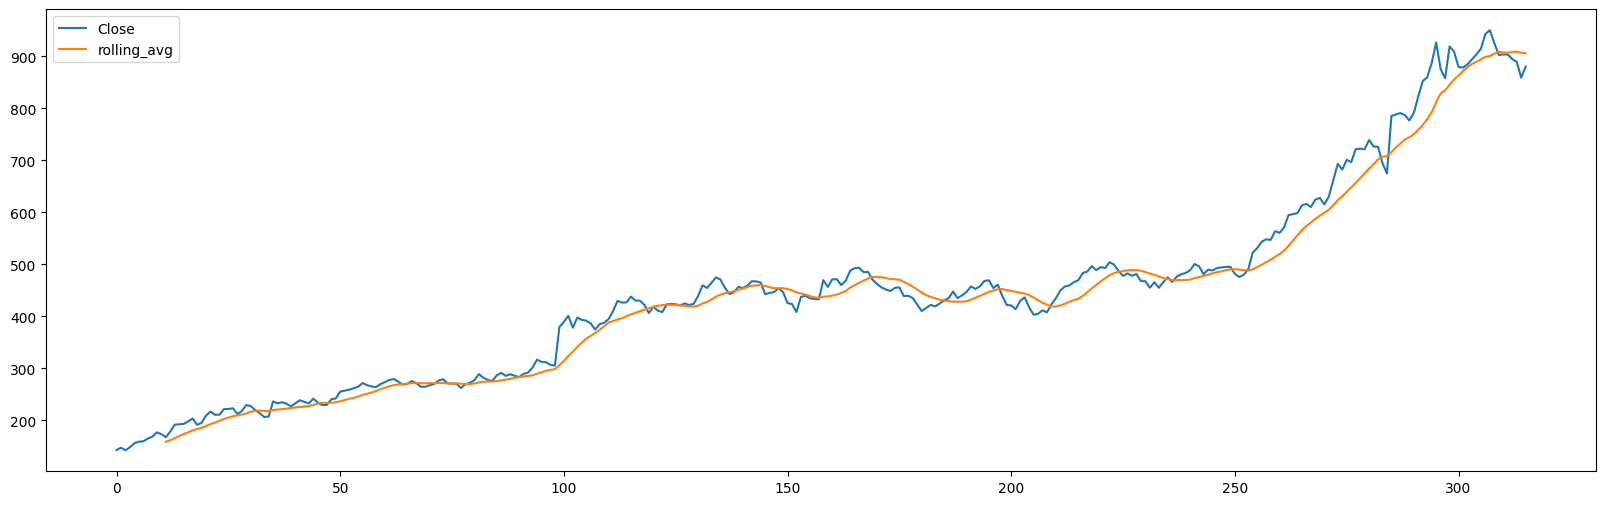

In [14]:
df_nvdia["rolling_avg"] = df_nvdia["Close"].rolling(window=12).mean()
df_nvdia.plot(y=["Close", "rolling_avg"], figsize = (20,6))

In [15]:
df_nvdia_stock = df_nvdia[["date", "Close", "rolling_avg"]].copy()

In [16]:
df_nvdia_stock.set_index("date", inplace = True)
df_nvdia_stock.head()

,Close,rolling_avg
date,,
2023-01-03,143.149994,NaN
2023-01-04,147.490005,NaN
2023-01-05,142.649994,NaN
2023-01-06,148.589996,NaN
2023-01-09,156.279999,NaN


In [21]:
df_nvdia_stock.rename(columns = {'Close':'price'}, inplace = True)

<Axes: title={'center': 'NVDIA Stock Price'}, xlabel='Date', ylabel='Price'>

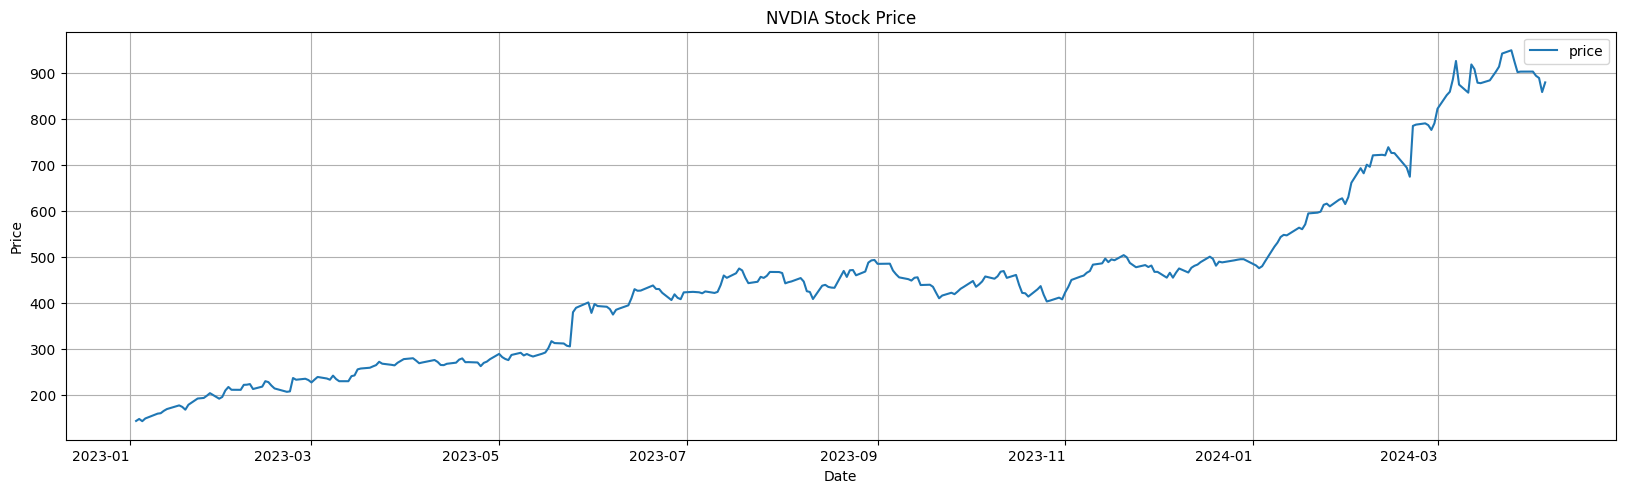

In [22]:
df_nvdia_stock.plot(y=["price"], figsize = (20,6),
                    rot=0,
                    title='NVDIA Stock Price',
                    xlabel='Date',
                    ylabel='Price',
                    grid = True)

## Stasioner

Istilah 'Auto Regressive' dalam ARIMA adalah model regresi linier yang menggunakan lagnya sendiri (nilai sebelumnya) sebagai prediktor atau independent variable. Model regresi linier bekerja dengan sangat baik ketika prediktor tidak berkorelasi dan independen satu sama lain.

*   ARIMA mengharuskan data time series bersifat stasioner, artinya mean(rata-rata) dan variansi (ragam) dari data harus tetap konstan seiring waktu. Jika data tidak stasioner, kita perlu melakukan differencing (mengambil selisih antara data berturut-turut) untuk mencapai stasionaritas.
*   Stasionaritas juga dapat diuji menggunakan uji statistik seperti Augmented Dickey-Fuller (ADF) atau Kwiatkowski-Phillips-Schmidt-Shin (KPSS).




### Plot data menggunakan autocorrelation function

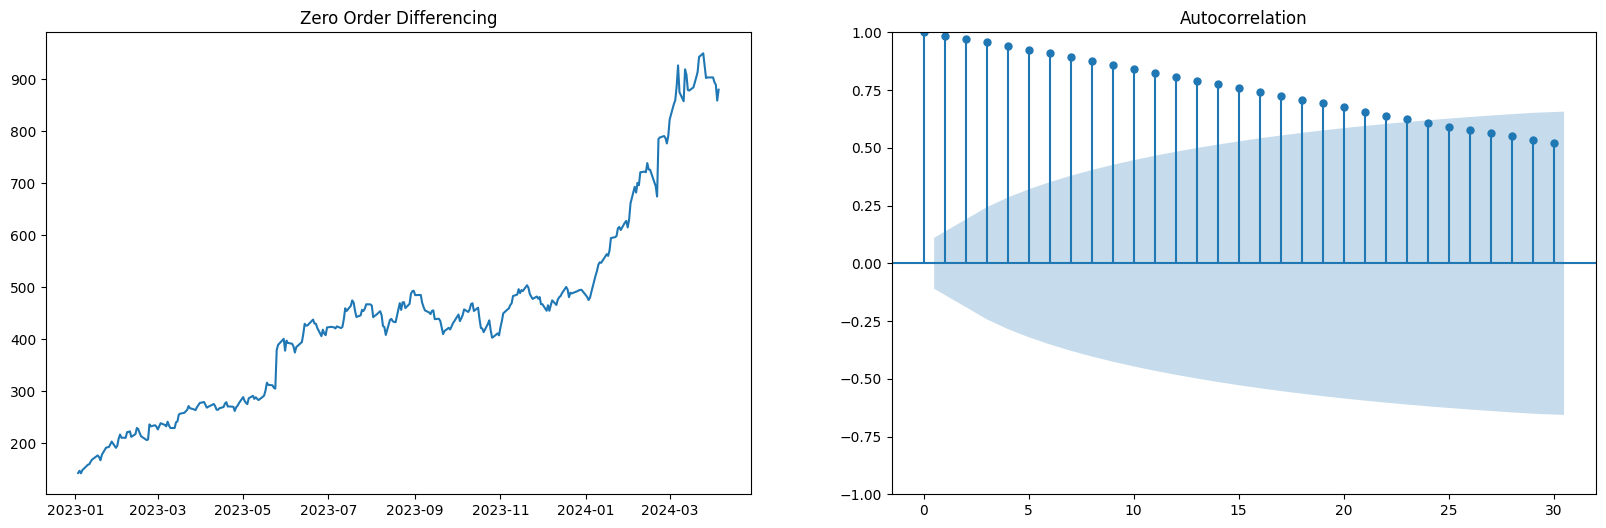

In [23]:
f = plt.figure(figsize=(20, 6))
ax1 = f.add_subplot(121)
ax1.set_title('Zero Order Differencing')
ax1.plot(df_nvdia_stock['price'])

ax2 = f.add_subplot(122)
plot_acf(df_nvdia_stock['price'], ax = ax2, lags=30)

plt.show()


Pada grafik autocorrelation terlihat
*   hampir semua lag menurun secara teratur dan bernilai mendekati 1, ini berarti dataset memiliki korelasi yang kuat
*   hamoir semua data berada diatas garis biru, ini berarti dataset memiliki korelasi yang kuat



### Uji Augmented Dickey Fuller (ADF)

Algoritma ini adalah perhitungan matematis untuk menentukan p-value. Untuk menentukan order differencing, adalah dengan membandingkan dengan nilai ambang batas atau tingkat signifikansi 0,05. Jika p-value lebih kecil dari level ini, maka data tersebut stasioner

In [26]:
result = adfuller(df_nvdia_stock['price'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 0.30820184034330217
p-value: 0.9777176684050471
Critial Values:
   1%, -3.4521902441030963
Critial Values:
   5%, -2.871158406898617
Critial Values:
   10%, -2.5718948388228586


Hasil uji ADF terlihat bahwa
*   nilai ADF Statistic lebih besar dari semua Critical Value
*   nilai p-value lebih besar dari 0.05

Kedua hal tersebut mengindikasikan secara jelas bahwa data price tidak stasioner



### Membuat Data Menjadi Stasioner

Bagaimana membuat dataset menjadi stasioner?

Pendekatan yang paling umum digunakan adalah dengan difference, yaitu mengurangi nilai sebelumnya dengan nilai saat ini. Nilai d adalah jumlah diferensial minimum yang diperlukan untuk membuat deret tersebut stasioner.

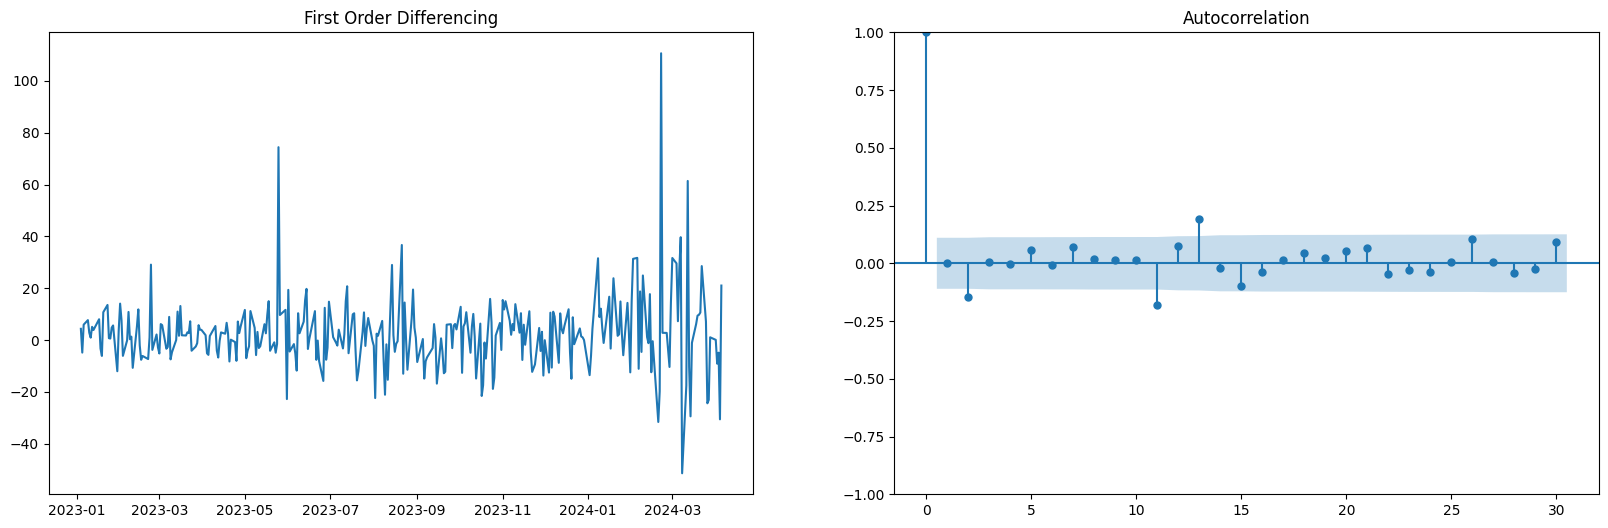

In [29]:
f = plt.figure(figsize=(20, 6))
ax1 = f.add_subplot(121)
ax1.set_title('First Order Differencing')
ax1.plot(df_nvdia_stock['price'].diff())

ax2 = f.add_subplot(122)
plot_acf(df_nvdia_stock['price'].diff().dropna(), ax = ax2, lags=30)

plt.show()

Hasil Differencing tingkat pertama, terlihat bahwa
*   hampir semua lag berada di dalam area biru
*   hampir semua lag mendekati nilai 0

Hal ini cukup mengindikasikan bahwa data sudah stasioner



Uji ADF

In [28]:
result = adfuller(df_nvdia_stock['price'].diff().dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -3.888610606534243
p-value: 0.002120284134010755
Critial Values:
   1%, -3.4521902441030963
Critial Values:
   5%, -2.871158406898617
Critial Values:
   10%, -2.5718948388228586


Hasil uji ADF memperlihatkan bahwa
*   nilai ADF Statistics lebih kecil dari semua Critical Value
*   nilai p-value < 0.005

Ini mengindikasikan data sudah stasioner.



### Second Order Differencing

Walaupun data sudah statsioner pada differencing tingkat pertama, (mungkin) ada baiknya kita uji untuk differencing tingkat kedua

In [31]:
result = adfuller(df_nvdia_stock['price'].diff().diff().dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -9.361918010193344
p-value: 7.781720997269363e-16
Critial Values:
   1%, -3.4521902441030963
Critial Values:
   5%, -2.871158406898617
Critial Values:
   10%, -2.5718948388228586


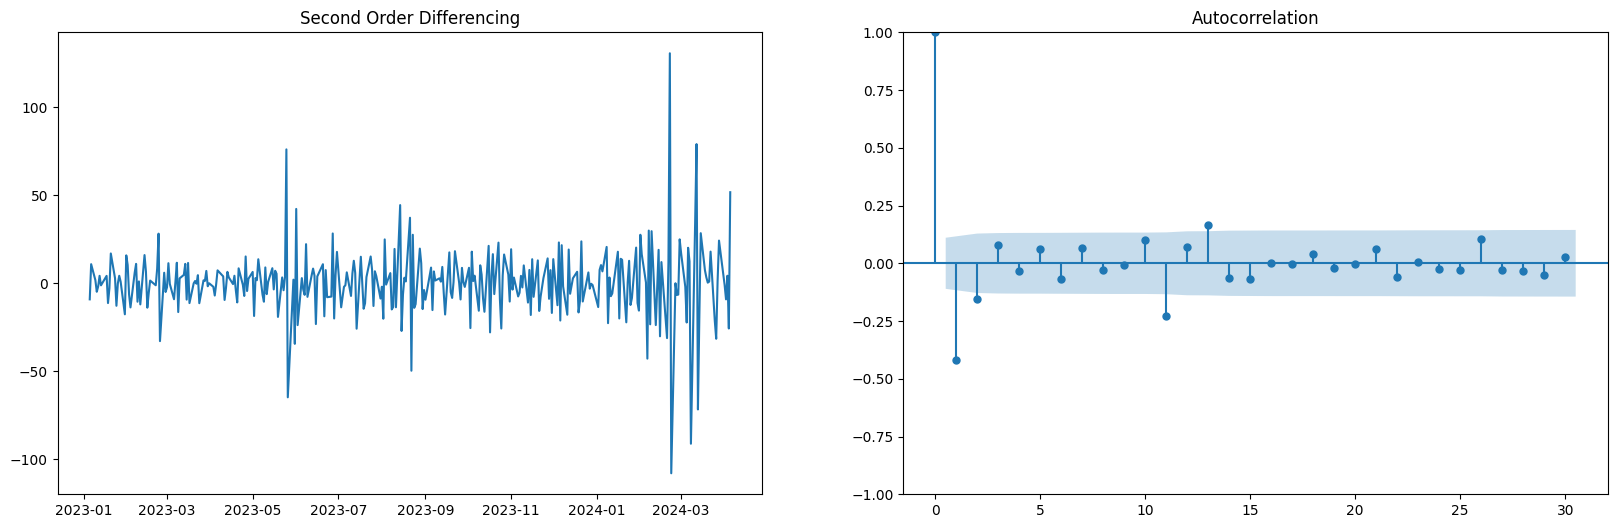

In [33]:
f = plt.figure(figsize=(20, 6))
ax1 = f.add_subplot(121)
ax1.set_title('Second Order Differencing')
ax1.plot(df_nvdia_stock['price'].diff().diff())

ax2 = f.add_subplot(122)
plot_acf(df_nvdia_stock['price'].diff().diff().dropna(), ax = ax2, lags=30)

plt.show()

## Menentukan order 'Auto Regressive' (AR)

Model Auto Regressive (hanya AR) murni adalah model di mana Yt hanya bergantung pada lag-nya sendiri. Artinya, Yt adalah fungsi dari 'lag Yt'.

'p' adalah order dari 'Auto Regressive' (AR), yang mengacu pada jumlah lag dari Y yang akan digunakan sebagai prediktor. Nilai p dapat ditentukan dengan menggunakan grafik Partial Autocorrelation (PACF).

Partial Autocorrelation menggambarkan korelasi antara deret dan lag-nya, setelah membuang kontribusi dari intermediate lag. Jadi, PACF semacam menyampaikan korelasi murni antara lag dan seri.

Setiap autokorelasi dalam deret stasioner dapat diperbaiki dengan menambahkan menambahkan nilai p yang cukup. Jadi, kita awalnya mengambil urutan istilah AR sama dengan banyak lag yang melintasi batas signifikansi di plot PACF.

Cari lag dimana batang PACF pertama kali memotong batas kepercayaan (confidence interval) dan kemudian berada di dalam batas kepercayaan.

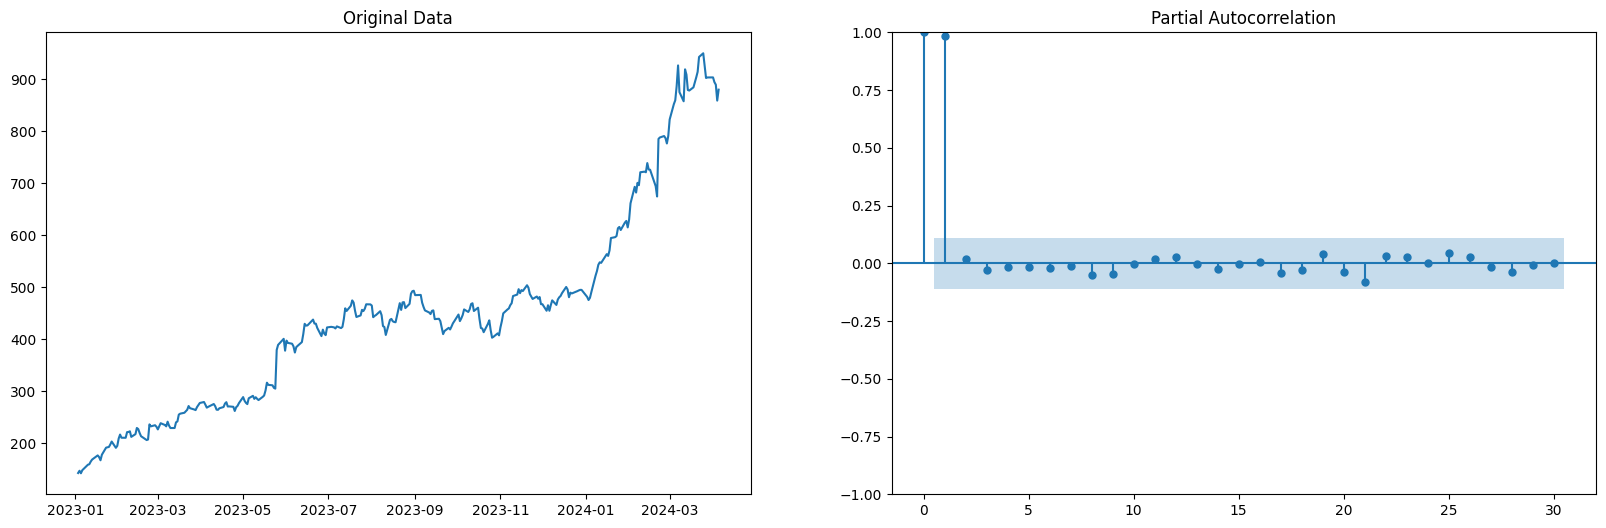

In [36]:
f = plt.figure(figsize=(20, 6))
ax1 = f.add_subplot(121)
ax1.set_title('Original Data')
ax1.plot(df_nvdia_stock['price'])

ax2 = f.add_subplot(122)
plot_pacf(df_nvdia_stock['price'].dropna(), ax = ax2, lags=30)

plt.show()

Terlihat bahwa lag 2 pada PACF adalah memiliki yang cukup signifikan dan berada jauh di atas batas kepercayaan dibandingkan dengan nilai lainnya. Oleh karena itu, kita dapat dengan aman menetapkan p ke 2

## Menentukan order 'Moving Average' (MA)

Nilai q pada ARIMA biasanya diambil sebagai lag terakhir di mana batang ACF berada di luar interval kepercayaan atau yang menunjukkan korelasi signifikan.

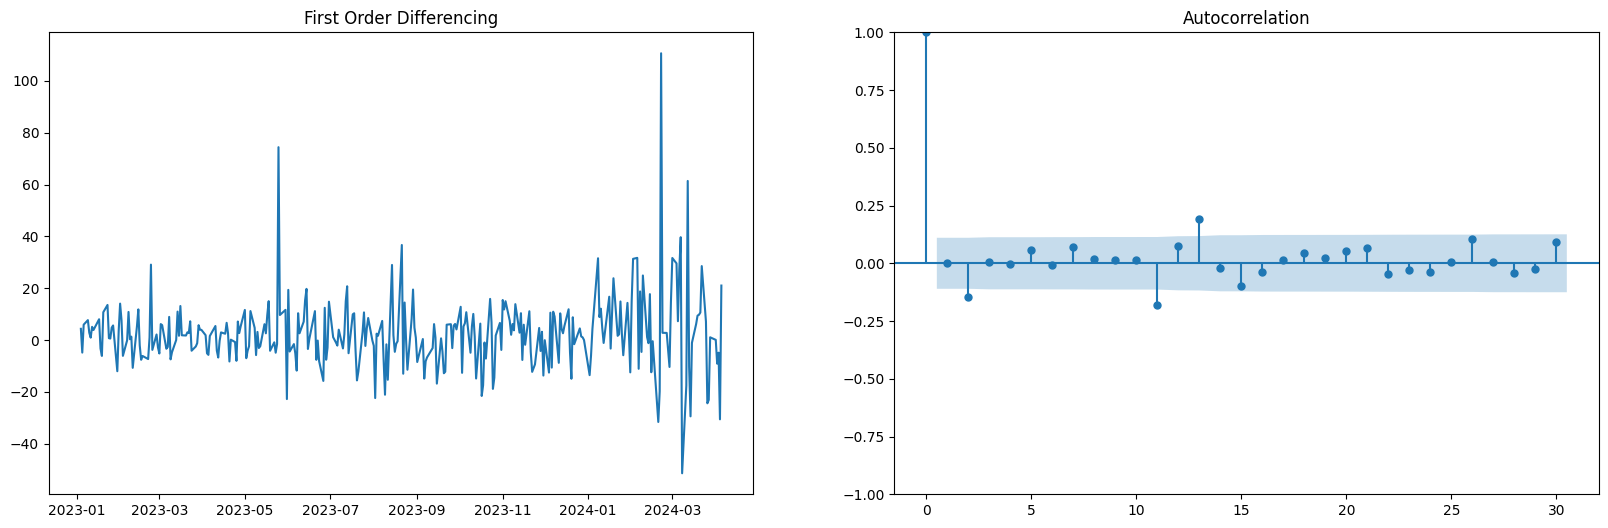

In [34]:
f = plt.figure(figsize=(20, 6))
ax1 = f.add_subplot(121)
ax1.set_title('First Order Differencing')
ax1.plot(df_nvdia_stock['price'].diff()

ax2 = f.add_subplot(122)
plot_acf(df_nvdia_stock['price'].diff().dropna(), ax = ax2, lags=30)

plt.show()

Sehingga hipotesa untuk nilai p = 2, d = 1 dan q = 14

## Membuat Model ARIMA

In [37]:
data = df_nvdia_stock['price'].values
print('Length of Total data: ', len(data))
train_length = int(len(data) * 0.8)
train_data = data[:train_length]
test_data = data[train_length:]
print('Train and Test data length: ', len(train_data), len(test_data))

Length of Total data:  316
Train and Test data length:  252 64


In [45]:
model = ARIMA(train_data, order=(2,1,14))
model_arima = model.fit()

In [46]:
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  252
Model:                ARIMA(2, 1, 14)   Log Likelihood                -935.709
Date:                Wed, 09 Oct 2024   AIC                           1905.418
Time:                        19:18:35   BIC                           1965.350
Sample:                             0   HQIC                          1929.536
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2788      1.043      0.267      0.789      -1.765       2.322
ar.L2         -0.1115      0.836     -0.133      0.894      -1.750       1.527
ma.L1         -0.2450      1.036     -0.237      0.8

## Residual

Residu adalah nilai kesalahan atau selisih antara nilai observasi aktual (dari data asli) dan nilai yang dihasilkan oleh model prediktif.

Residual digunakan untuk mengukur akurasi model. Jika residu kecil dan tersebar secara acak di sekitar garis nol, ini menunjukkan bahwa model memprediksi data dengan baik.

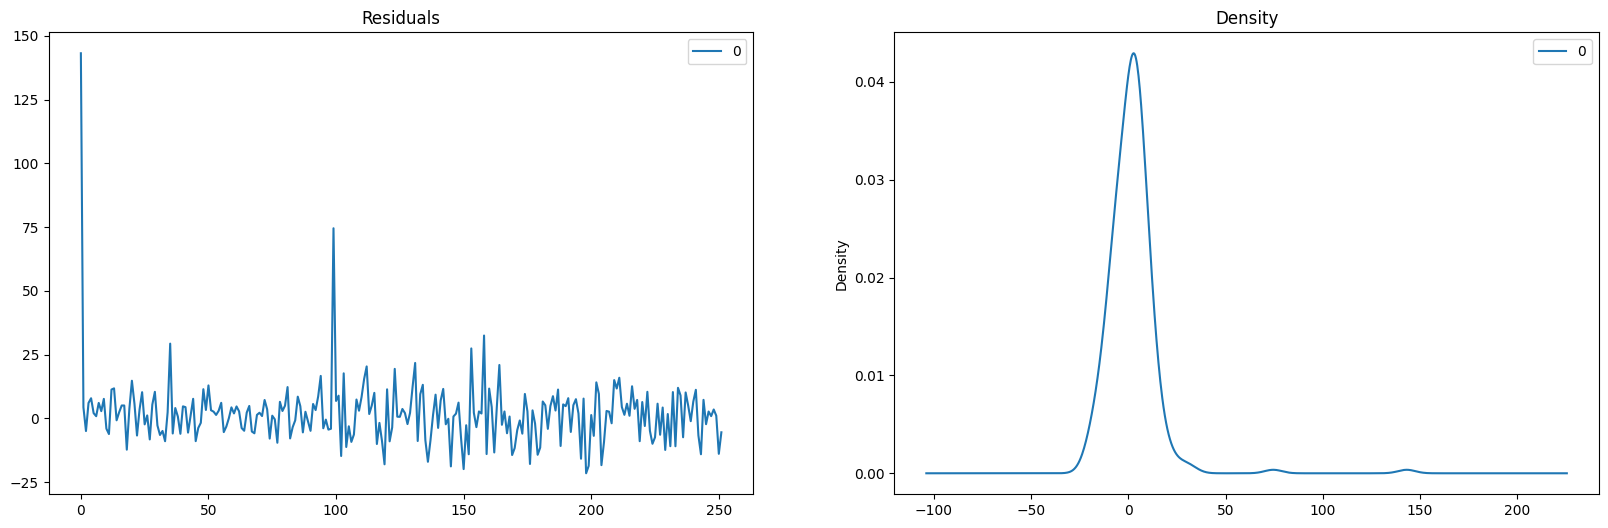

In [48]:
residuals = pd.DataFrame(model_arima.resid)

f = plt.figure(figsize=(20, 6))
ax1 = f.add_subplot(121)
ax1.set_title('Residuals')
#ax1.plot(df_nvdia_stock['price'].diff()
residuals.plot(title = "Residuals", ax = ax1)


ax2 = f.add_subplot(122)
#plot_acf(df_nvdia_stock['price'].diff().dropna(), ax = ax2, lags=30)
residuals.plot(kind = 'kde', title = 'Density', ax = ax2)

plt.show()

## Forecasting

In [49]:
forecast_result = model_arima.forecast(50, alpha = 0.05)  # 95% conf
forecast_result[:30]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


array([473.35908359, 476.0106995 , 475.83301534, 472.64767804,
       473.09008547, 473.23194088, 473.53091363, 473.07759428,
       472.5851335 , 473.09454151, 472.41409045, 472.32908038,
       473.65417025, 474.44416335, 474.51674823, 474.44893794,
       474.42194043, 474.42197056, 474.42498798, 474.42582597,
       474.42572332, 474.4256013 , 474.42557871, 474.42558602,
       474.42559057, 474.42559103, 474.42559065, 474.42559049,
       474.42559049, 474.42559051])

In [50]:
test_data[:30]

array([479.980011, 490.970001, 522.530029, 531.400024, 543.5     ,
       548.219971, 547.099976, 563.820007, 560.530029, 571.070007,
       594.909973, 596.539978, 598.72998 , 613.619995, 616.169983,
       610.309998, 624.650024, 627.73999 , 615.27002 , 630.27002 ,
       661.599976, 693.320007, 682.22998 , 700.98999 , 696.409973,
       721.330017, 722.47998 , 721.280029, 739.      , 726.580017])

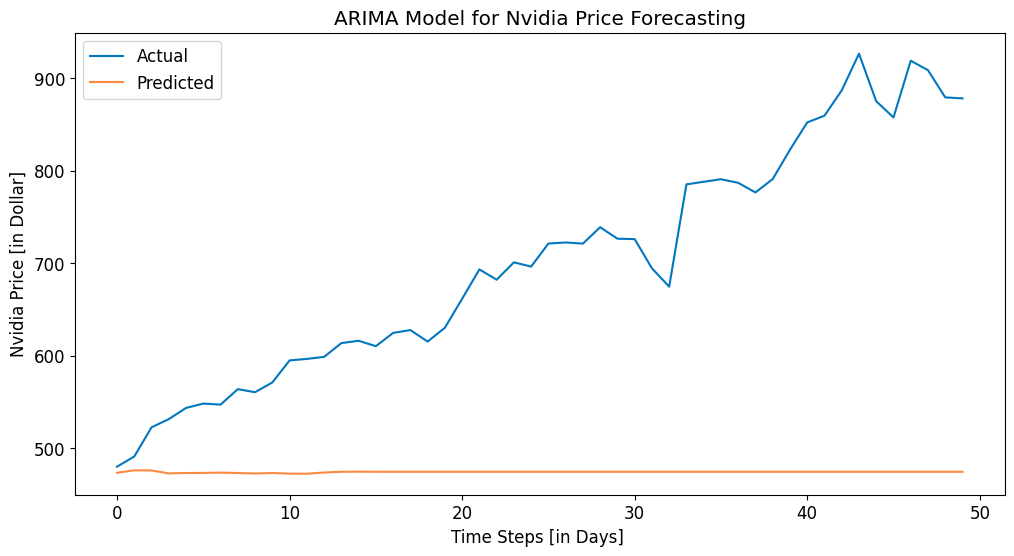

In [51]:
plt.figure(figsize = (12, 6))
plt.rcParams.update({'font.size': 12})
plt.plot(test_data[:50], '#0077be',label = 'Actual')
plt.plot(forecast_result[:], '#ff8841',label = 'Predicted')
plt.title('ARIMA Model for Nvidia Price Forecasting')
plt.ylabel('Nvidia Price [in Dollar]')
plt.xlabel('Time Steps [in Days] ')
plt.legend()
plt.show()

## Perbaikan

In [67]:
model = ARIMA(train_data, order=(2,2,6))
model_arima = model.fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  252
Model:                 ARIMA(2, 2, 6)   Log Likelihood                -934.543
Date:                Wed, 09 Oct 2024   AIC                           1887.086
Time:                        19:43:31   BIC                           1918.779
Sample:                             0   HQIC                          1899.842
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7285      0.041    -42.167      0.000      -1.809      -1.648
ar.L2         -0.9928      0.044    -22.593      0.000      -1.079      -0.907
ma.L1          0.7634      2.361      0.323      0.7

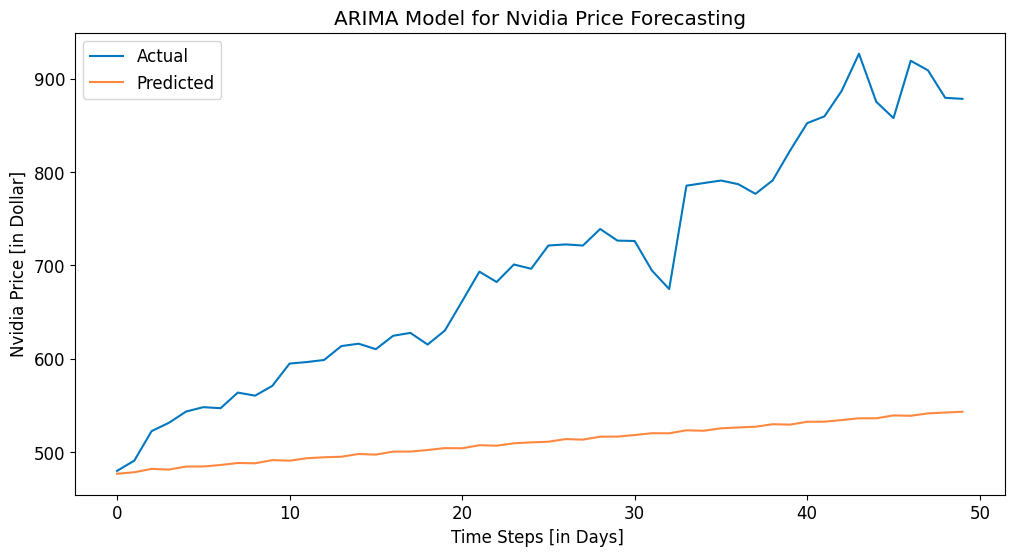

In [68]:
forecast_result = model_arima.forecast(50, alpha = 0.05)

plt.figure(figsize = (12, 6))
plt.rcParams.update({'font.size': 12})
plt.plot(test_data[:50], '#0077be',label = 'Actual')
plt.plot(forecast_result[:], '#ff8841',label = 'Predicted')
plt.title('ARIMA Model for Nvidia Price Forecasting')
plt.ylabel('Nvidia Price [in Dollar]')
plt.xlabel('Time Steps [in Days] ')
plt.legend()
plt.show()

## Penggunaan Grid Search

Metode ini mencari model terbaik dengan menguji coba setiap parameter p,d,q

In [61]:
import warnings

def evaluate_arima_model(data_train, data_test, arima_order):

    model = ARIMA(data_train, order=arima_order)
    model_fit = model.fit()
    fc = model_fit.forecast(data_test.size, alpha=0.05)
    #fc_series = pd.Series(fc[0], index=data_test.index)

    #rmse = sqrt(mean_squared_error(data_test, fc_series))
    rmse = sqrt(mean_squared_error(data_test, fc))
    #rmse = model_fit.aic

    return rmse

In [65]:
def evaluate_models(data_train, data_test, p_values, d_values, q_values):

	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(data_train, data_test, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					#print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [66]:
p_values = [0, 1, 2, 3, 4]
d_values = range(0, 3)
q_values = range(0, 8)
warnings.filterwarnings("ignore")
evaluate_models(train_data, test_data, p_values, d_values, q_values)

Best ARIMA(2, 2, 6) RMSE=252.212
